In [2]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skillsnetwork
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Dataset
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h2>Linear Regression and Multiple Linear Regression</h2>

In [11]:
# import librarie
from sklearn.linear_model import LinearRegression

### Liner Regression

In [5]:
#create the linear regression object
lm=LinearRegression()
lm

LinearRegression()

In [6]:
# variables
X = df[['highway-mpg']]
Y = df['price']

In [7]:
# fit the model Yhat=a+bX
lm.fit(X,Y)

LinearRegression()

In [8]:
# predictions
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [10]:
#Value of the intercept (a)
lm.intercept_
#value of the slope (b)
lm.coef_

array([-821.73337832])

Model: Price = 38423.31 - 821.73 x highway-mpg

### Multiple Linear Regression

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$

In [14]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y=df[['price']]
lm.fit(Z,Y)

LinearRegression()

In [15]:
#intercep (a)
lm.intercept_

array([-15806.62462633])

In [16]:
#coefficients (b1, b2, b3, b4)
lm.coef_

array([[53.49574423,  4.70770099, 81.53026382, 36.05748882]])

Model: Price = -15806.62462632918 + 53.49574423 x horsepower + 4.70770099 x curb-weight + 81.53026382 x engine-size + 36.05748882 x highway-mpg

<h2>Model Evaluation Using Visualization</h2>

In [17]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

### Regression Plot

(0, 48291.357368617435)

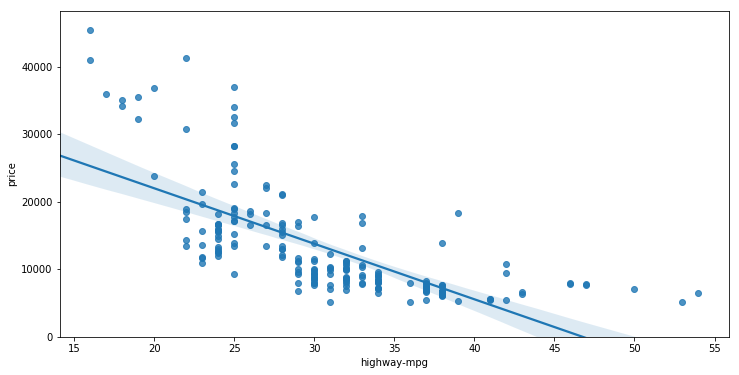

In [23]:
width = 12
height = 6
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0, 47428.79888384604)

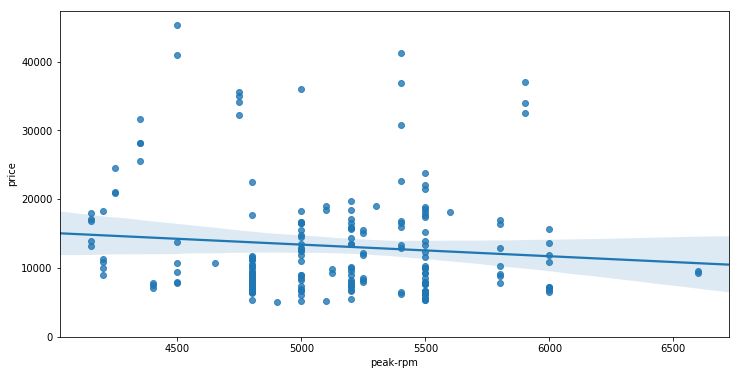

In [24]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [25]:
# Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? 
# Use the method ".corr()" to verify your answer.

df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


In [26]:
# The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692 
# compared to "peak-rpm" which is approximate -0.101616.

<h3>Residual Plot</h3>

<p>A good way to visualize the variance of the data is to use a residual plot.</p>

<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>


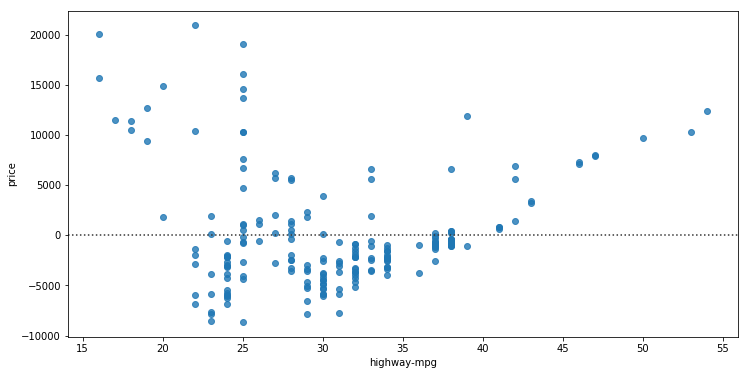

In [30]:
width = 12
height = 6
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

<p>We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.</p>

<h3>Multiple Linear Regression</h3>

<p>How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.</p>

<p>One way to look at the fit of the model is by looking at the <b>distribution plot</b>. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.</p>


In [34]:
#model
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y=df[['price']]
lm.fit(Z,Y)
#make a prediction
Y_hat = lm.predict(Z)

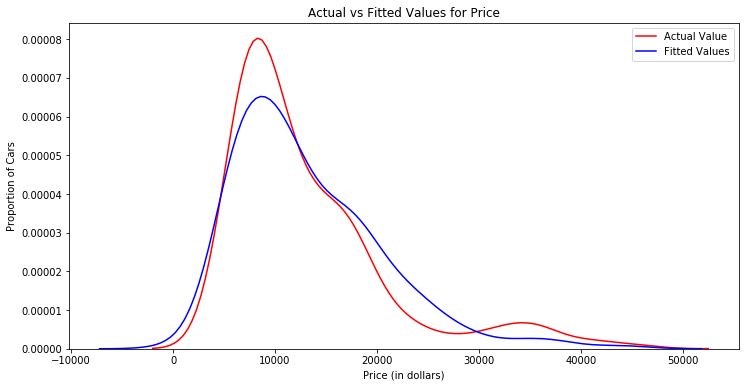

In [35]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<h2> Polynomial Regression and Pipelines</h2>


<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p> 
<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>

<p>There are different orders of polynomial regression:</p>


<b>Quadratic - 2nd Order</b>
$$
Yhat = a + b_1 X +b_2 X^2 
$$

<b>Cubic - 3rd Order</b>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\\\\\\\
$$

<b>Higher-Order</b>:
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$


In [37]:
# function to plot the data

def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [38]:
# model
x = df['highway-mpg']
y = df['price']

In [39]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


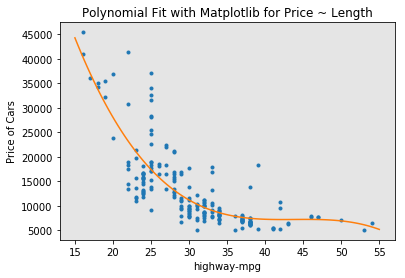

In [48]:
# plot 
PlotPolly(p, x, y, 'highway-mpg')

In [47]:
#coefficients (a, b1, b2, b3) -> array
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [51]:
#coefficients (a, b1, b2, b3) -> poly1d
np.poly1d(np.polyfit(x, y, 3))

poly1d([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [52]:
print(np.poly1d(np.polyfit(x, y, 3)))

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


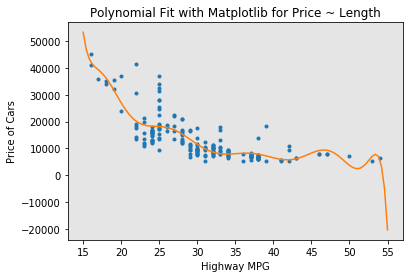

In [53]:
# Here we use a polynomial of the 11rd order (cubic) 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

### Polynomial With Two Variables

$$
Yhat = a + b\_1 X\_1 +b\_2 X\_2 +b\_3 X\_1 X\_2+b\_4 X\_1^2+b\_5 X\_2^2
$$

In [59]:
from sklearn.preprocessing import PolynomialFeatures

<b>PolynomialFeatures</b> object of degree 2:

In [60]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [65]:
#model
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Z_pr=pr.fit_transform(Z)

In [66]:
Z.shape

(201, 4)

In [67]:
Z_pr.shape

(201, 15)

In [68]:
print(Z_pr)

[[1.0000e+00 1.1100e+02 2.5480e+03 ... 1.6900e+04 3.5100e+03 7.2900e+02]
 [1.0000e+00 1.1100e+02 2.5480e+03 ... 1.6900e+04 3.5100e+03 7.2900e+02]
 [1.0000e+00 1.5400e+02 2.8230e+03 ... 2.3104e+04 3.9520e+03 6.7600e+02]
 ...
 [1.0000e+00 1.3400e+02 3.0120e+03 ... 2.9929e+04 3.9790e+03 5.2900e+02]
 [1.0000e+00 1.0600e+02 3.2170e+03 ... 2.1025e+04 3.9150e+03 7.2900e+02]
 [1.0000e+00 1.1400e+02 3.0620e+03 ... 1.9881e+04 3.5250e+03 6.2500e+02]]


<h3>Pipeline</h3>

<p>Data Pipelines simplify the steps of processing the data. We use the module <b>Pipeline</b> to create a pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.</p>

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

In [71]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [73]:
print(Input)

[('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]


In [74]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

Then, we can normalize the data, perform a transform and fit the model simultaneously.

In [75]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [77]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

<b>Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.</b>

In [83]:
y = df['price']
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]


Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

<h2>Measures for In-Sample Evaluation</h2>


<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>

<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>

<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>

<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).</p>


<h3>Model 1: Simple Linear Regression</h3>

In [93]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339175


We can say that \~49.659% of the variation of the price is explained by this simple linear model, which we have built using the highway_mpg data.

In [94]:
# MSE
# make the predictions to compare with the observed value
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [[16236.50464347]
 [16236.50464347]
 [17058.23802179]
 [13771.3045085 ]]


In [95]:
from sklearn.metrics import mean_squared_error

In [96]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


<h3>Model 2: Multiple Linear Regression</h3>

In [98]:
# fit the model 
lm2=LinearRegression()
lm2.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm2.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [99]:
# fit the model (alternative 1)
lm2.fit(Z, Y)
# Find the R^2
print('The R-square is: ', lm2.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [113]:
# fit the model (alternative 2)
lm2.fit(Z, y)
# Find the R^2
print('The R-square is: ', lm2.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [114]:
# alternative code (r2_score metric)
## import r2_score metric
from sklearn.metrics import r2_score

##  calculare r_squared
r_squared = r2_score(df['price'], Y_predict_multifit)
print('The R-square is: ', r_squared)

The R-square is:  0.8093562806577457


In [101]:
Y_predict_multifit = lm2.predict(Z)
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


In [111]:
r_squared = r2_score(df['price'], Y_predict_multifit)

0.8093562806577457

<h3>Model 3: Polynomial Fit</h3>

In [106]:
from sklearn.metrics import r2_score

In [ ]:
x = df['highway-mpg']
y = df['price']


In [103]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [107]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


In [109]:
# 10 first predict values
p(x)[0:10]

array([14483.47732606, 14483.47732606, 15876.76908652, 11210.24198667,
       23210.06482402, 17436.73388684, 17436.73388684, 17436.73388684,
       28063.54752614, 12159.55360585])

In [115]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [116]:
#MSE
mean_squared_error(df['price'], p(x))

20474146.426361218

<h2>Prediction and Decision Making</h2>
<h3>Prediction</h3>

<p>In the previous section, we trained the model using the method <b>fit</b>. Now we will use the method <b>predict</b> to produce a prediction. Lets import <b>pyplot</b> for plotting; we will also be using some functions from numpy.</p>


In [117]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [118]:
#numbers 1 to 100
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [123]:
lm=LinearRegression()
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X, Y)
lm

LinearRegression()

In [122]:
yhat=lm.predict(new_input)
yhat[0:5]

C:\Users\fiu126\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[37601.57247984],
       [36779.83910151],
       [35958.10572319],
       [35136.37234487],
       [34314.63896655]])

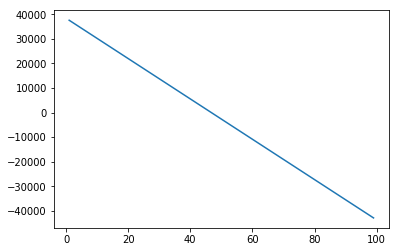

In [124]:
# plot the data
plt.plot(new_input, yhat)
plt.show()


<h3>Decision Making: Determining a Good Model Fit</h3>


Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

* What is a good R-squared value?
When comparing models, the model with the higher R-squared value is a better fit for the data.

* What is a good MSE?
When comparing models, the model with the smallest MSE value is a better fit for the data.

Let's take a look at the values for the different models.
Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
* R-squared: 0.49659118843391759
* MSE: 3.16 x10^7

Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
* R-squared: 0.80896354913783497
* MSE: 1.2 x10^7

Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
* R-squared: 0.6741946663906514
* MSE: 2.05 x 10^7

<h4>Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)</h4>

<p>Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R^2.</p>

<p>In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.
<ul>
    <li><b>MSE</b>: The MSE of SLR is  3.16x10^7  while MLR has an MSE of 1.2 x10^7.  The MSE of MLR is much smaller.</li>
    <li><b>R-squared</b>: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).</li>
</ul>
</p>

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.

<h4>Simple Linear Model (SLR) vs. Polynomial Fit</h4>

<ul>
    <li><b>MSE</b>: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</li> 
    <li><b>R-squared</b>: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.</p>

<h4>Multiple Linear Regression (MLR) vs. Polynomial Fit</h4>

<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>
</ul>


<h2>Conclusion</h2>

<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.</p>
